# Gradient Descent

Lets see how steeepest gradient descent works for example in class. You don't have to completely understand the code but I will walk you through basic idea and we will see the plot'

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Our function was f(x) = x^2. Power operator is ** in Python
def f(x_k):
    return x_k**2

# Gradient of x**2 is 2x
def gradient(x_k): 
    return 2*(x_k)

# d_k is direction of descent = -D*gradient(at x_k) where D is positive definite matrix
def d_k(x_k, D=1):
    return -D*gradient(x_k)

# If you do not get this, ignore it. Just assume that it gives a constant value = c which is alphe
def constant_alpha(c): 
    def alpha(k,x):
        return c 
    return alpha

# The train methos on GradientDescent does the actual work of descending in direction of gradient
class GradientDescent:
    def __init__(self, D=1):
        self.D = D # We set D to be an 1x1 identity matrix which is the scalar 1. Why 1x1?
    
    def train(self, f, d_k, x_0, alpha=constant_alpha(0.1), epsilon=1e-8, max_iterations=150):
        # Ignore this mumbo jumbo
        step = 1
        x = x_0
        fx = f(x_0)
        fx_prev = f(x_0) - 1
        fx_history = [f(x_0)]
        x_history = [x_0]
        while (fx - fx_prev) >= epsilon or step <= max_iterations:
            x_new = x + alpha(step,x)*d_k(x, self.D) # This is the main step
            # x_(k+1) = x_k + alpha_k*[-D*gradient(at x_k)]
            fx_prev = fx
            fx = f(x_new)
            if step%50 == 0:
                print("At step",step,"x -",x_new,"f(x) -",fx)
            x_history.append(x_new)
            x=x_new
            fx_history.append(fx)
            step+=1
        return x, x_history, fx_history
    

minimizer = GradientDescent(D = 1)
optimal_x, x_history, fx_history = minimizer.train(f, d_k, 2.0)
print("Optimal x -",optimal_x)

At step 50 x - 2.8544953854119208e-05 f(x) - 8.148143905337951e-10
At step 100 x - 4.0740719526689754e-10 f(x) - 1.6598062275523998e-19
At step 150 x - 5.8147097943648615e-15 f(x) - 3.381084999268265e-29
Optimal x - 5.8147097943648615e-15


We see that optimal x is 5x10^(-15) which is practically 0. Now lets see how our steps progressed by plotting actual function and our x_k

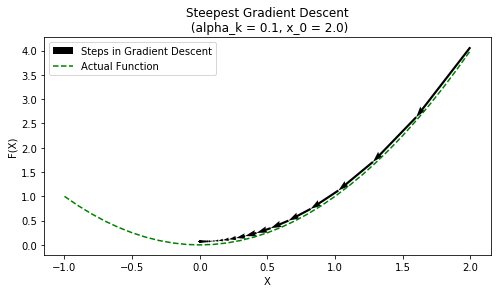

In [25]:
# Rest all is just plotting and printing so just ignore
def frange(x, y, jump):
    while x < y:
        yield x
        x += jump

fig, ax = plt.subplots(figsize=(8, 4))
grad_des_plot = ax.quiver(x_history[:-1], np.add(fx_history[:-1],0.07),
[i - j for i, j in zip(x_history[1:], x_history[:-1])],
[i - j for i, j in zip(fx_history[1:], fx_history[:-1])], scale_units='xy', angles='xy', scale=1, label="Steps in Gradient Descent")
function_plot = ax.plot([i for i in frange(-1.0,2.1,0.1)],[f(i) for i in frange(-1.0,2.1,0.1)],'g--', label="Actual Function") 
ax.set_title("Steepest Gradient Descent\n (alpha_k = 0.1, x_0 = 2.0)") 
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.legend(handles=[grad_des_plot, function_plot[0]])
plt.show()

I hope this gives an intuitive feel for gradient descent. Think about how it would look when function is 2 dimensional! If interested, try and refactor code for the 2 dimensional case

Also, which function would you modify to convert Steepest Descent to Newton's Method? What about Gauss Newton method?